f(x)和目标函数
$$
\begin{aligned}
&f_{\theta}(x) =\theta_{0} +\theta_{1} x \\
    & E(\theta) =\frac{1}{2} \sum_{i = 1} ^ {n}\left(y_{i}-f_{\theta}\left(x_{i}\right)\right) ^ {2}
\end{aligned}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from icecream import ic # 没什么用
from IPython import display
import matplotlib.animation as animation
%matplotlib inline


In [2]:
train = np.loadtxt('data/click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]

**标准化**  
问：为什么要标准化？  
答：有利于更快拟合  

z-score 公式
$$
z_i = \frac{x_i-\mu}{\sigma}
$$


In [3]:
mu = train_x.mean()
sigma = train_x.std()

# zscore 标准化，mean变为0，sigama变为1
def standardize(x):
    return (x - mu) / sigma


train_z = standardize(train_x)

In [4]:
# 预测函数 一元一次：f(x)-theta0+theta1*x
def f(x):
    return theta0 + theta1 * x
# 目标函数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)


这个目标函数在三维空间就是一个U型曲面

[[-10.   -9.9  -9.8 ...   9.7   9.8   9.9]
 [-10.   -9.9  -9.8 ...   9.7   9.8   9.9]
 [-10.   -9.9  -9.8 ...   9.7   9.8   9.9]
 ...
 [-10.   -9.9  -9.8 ...   9.7   9.8   9.9]
 [-10.   -9.9  -9.8 ...   9.7   9.8   9.9]
 [-10.   -9.9  -9.8 ...   9.7   9.8   9.9]]
[[-10.  -10.  -10.  ... -10.  -10.  -10. ]
 [ -9.9  -9.9  -9.9 ...  -9.9  -9.9  -9.9]
 [ -9.8  -9.8  -9.8 ...  -9.8  -9.8  -9.8]
 ...
 [  9.7   9.7   9.7 ...   9.7   9.7   9.7]
 [  9.8   9.8   9.8 ...   9.8   9.8   9.8]
 [  9.9   9.9   9.9 ...   9.9   9.9   9.9]]


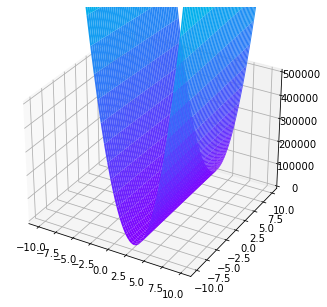

In [19]:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
#代价函数
theta1 = np.arange(-10, 10, 0.1)
theta0 = np.arange(-10, 10, 0.1)
theta1, theta0 = np.meshgrid(theta1, theta0)
print(theta1)  # 打印出来瞅瞅
print(theta0)


es = 0
#因为theta1和theta0已经变成了网格矩阵了
#一次性带入全部计算，我们需要一个一个的算
n = len(train_y)
for i in range(n):
	y_pre = theta1*train_x[i]+theta0  # 取出一个样本在网格矩阵上计算，得到一个预测矩阵
	e = (train_y[i]-y_pre)**2  # 标准值减去预测（矩阵）得到方差矩阵
	es += e  # 把单样本上的方差矩阵不断累加到es上
es = es/n  # 求平均值，这样es方差矩阵每个点的位置就是对应的theta1和theta0矩阵每个点位置预测得到的方差
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim(0, 500000)

#plot_surface函数绘制曲面
#cmap='rainbow表示彩虹图（用不同的颜色表示不同值）
ax.plot_surface(theta1, theta0, es, cmap='rainbow')
#显示图像
plt.show()


参数更新
$$
\begin{aligned}
&\theta_{0}:=\theta_{0}-\eta \sum_{i=1}^{n}\left(f_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) \\
&\theta_{1}:=\theta_{1}-\eta \sum_{i=1}^{n}\left(f_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x^{(i)}
\end{aligned}
$$

Epoch 1  : theta0 = 9.141, theta1 = 2.839, diff = 76125.2260
Epoch 2  : theta0 = 17.541, theta1 = 4.652, diff = 73110.6671
Epoch 3  : theta0 = 25.774, theta1 = 6.429, diff = 70215.4847
Epoch 4  : theta0 = 33.841, theta1 = 8.170, diff = 67434.9515
Epoch 5  : theta0 = 41.747, theta1 = 9.876, diff = 64764.5274
Epoch 6  : theta0 = 49.495, theta1 = 11.548, diff = 62199.8521
Epoch 7  : theta0 = 57.088, theta1 = 13.187, diff = 59736.7380
Epoch 8  : theta0 = 64.530, theta1 = 14.792, diff = 57371.1632
Epoch 9  : theta0 = 71.822, theta1 = 16.366, diff = 55099.2651
Epoch 10  : theta0 = 78.969, theta1 = 17.908, diff = 52917.3342
Epoch 11  : theta0 = 85.972, theta1 = 19.420, diff = 50821.8078
Epoch 12  : theta0 = 92.836, theta1 = 20.901, diff = 48809.2642
Epoch 13  : theta0 = 99.562, theta1 = 22.353, diff = 46876.4173
Epoch 14  : theta0 = 106.154, theta1 = 23.775, diff = 45020.1112
Epoch 15  : theta0 = 112.614, theta1 = 25.169, diff = 43237.3148
Epoch 16  : theta0 = 118.944, theta1 = 26.535, diff =

NameError: name 'animation' is not defined

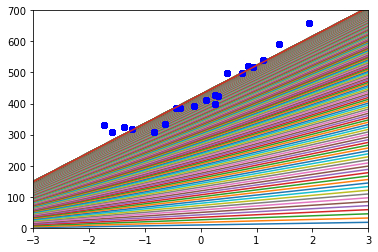

In [5]:
# 学习率
ETA = 1e-3
# 误差的差值
diff = 1
# 更新次数
epoch = 0
# 参数初始化
theta0 = np.random.rand()
theta1 = np.random.rand()
# 直到误差的差值小于 0.01 为止，重复参数更新
error = E(train_z, train_y)
errors = []
errors.append(error)

# ？这里用diff来判断是否停止循环，也就是当收敛时停止循环，我看有些人的代码是用epoch来规定迭代次数，所以机器学习里是用哪一个？
fig = plt.figure()
ims = []
plt.xlim(-3, 3)
plt.ylim(0, 700)
x = np.linspace(-3, 3, 100)
while diff > 1e-2:
    # 更新结果保存到临时变量 (问：为什么要先保存在临时变量中？ 答：为了同时更新参数，不然一个直接改了，另一个参数的更新也在改变)
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    # 更新参数
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    # 计算与上一次误差的差值
    error = E(train_z, train_y)
    errors.append(error)
    diff = abs(errors[-2]-errors[-1])
    # 输出日志
    epoch += 1
    log = 'Epoch {}  : theta0 = {:.3f}, theta1 = {:.3f}, diff = {:.4f}'
    print(log.format(epoch, theta0, theta1, diff))

    # 动态显示f(x)变化图
    # plt.text(0.8, 1, f'Epoch:{epoch:},Loss:{error:.2f}')
    im = plt.plot(train_z, train_y, 'o', color="blue") + plt.plot(x, f(x))
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=20, repeat_delay=1000)
ani.save("regression1_linear.gif", writer='pillow')


In [ ]:
import matplotlib.animation as animation
ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
ani.save("regression1_linear.gif", writer='pillow')


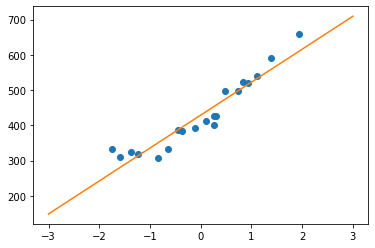

In [ ]:
# # 绘图确认
plt.clf()
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()


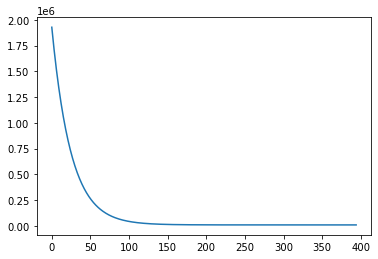

In [ ]:
# error 不断在下降
x = np.arange(len(errors))
plt.plot(x, errors)
plt.show()
